In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('C:/Users/mshiv/OneDrive/Desktop/Mental health prediction/survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [4]:
data.shape

(1259, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

<AxesSubplot:>

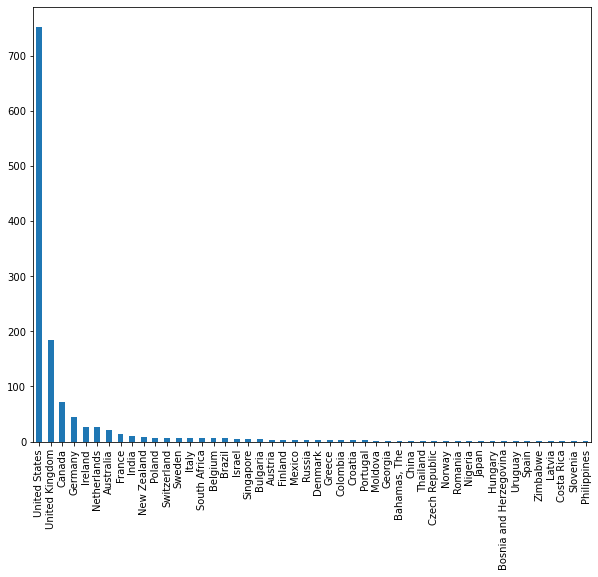

In [7]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [8]:
#Distribution of countries is not even so dropping country and state
#Dropping Timestamp and comments as they are irrelevant
data.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [9]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [11]:
#Replacing null values with No
data['self_employed'].fillna('No', inplace=True)

In [12]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [13]:
#Replacing null values with N/A
data['work_interfere'].fillna('N/A',inplace=True)

In [14]:
data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [15]:
data['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

<AxesSubplot:>

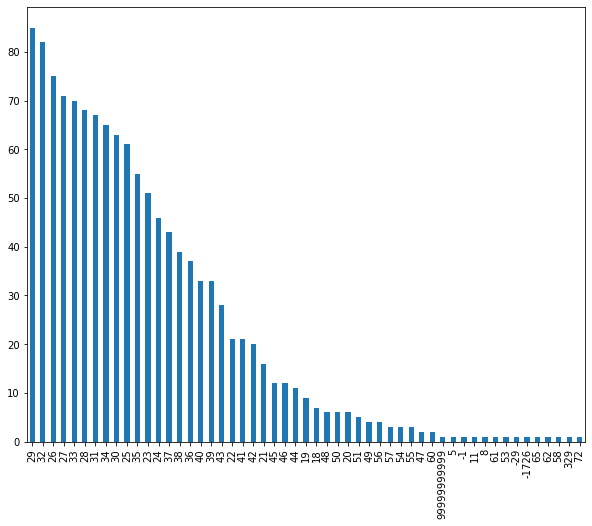

In [16]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [17]:
#Removing rows that have impractical values for age
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace=True)

In [18]:
#Resetting the index
data.reset_index(drop=True, inplace=True)

In [19]:
data['Gender'].value_counts()

Male                                              611
male                                              203
Female                                            120
M                                                 115
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [20]:
#Grouping all responses for gender into 3 major categories - Male, Female, Non-Binary
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

In [21]:
data['Gender'].value_counts()

Male          983
Female        246
Non-Binary     18
Name: Gender, dtype: int64

In [22]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [23]:
data['no_employees'].value_counts()

6-25              288
26-100            288
More than 1000    280
100-500           175
1-5               157
500-1000           59
Name: no_employees, dtype: int64

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

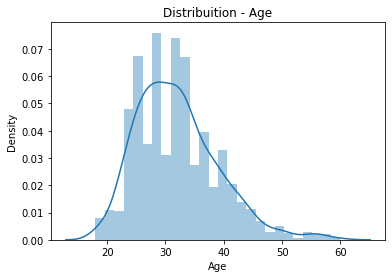

In [24]:
#Checking distribution of age
sb.distplot(data["Age"])
plt.title("Distribuition - Age")
plt.xlabel("Age")

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employment Type')

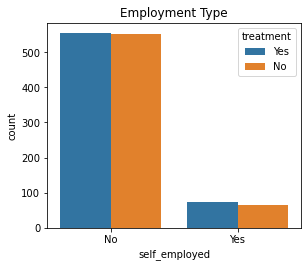

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data['self_employed'], hue = data['treatment'])
plt.title('Employment Type')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Family History')

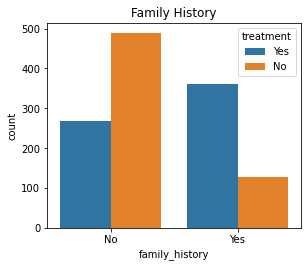

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(data['family_history'], hue = data['treatment'])
plt.title('Family History')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Interference')

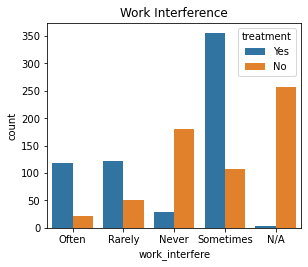

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(data['work_interfere'], hue = data['treatment'])
plt.title('Work Interference')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Type')

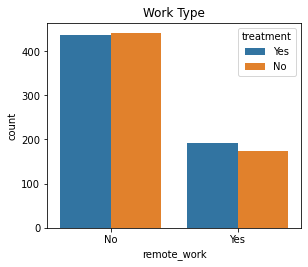

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(data['remote_work'], hue = data['treatment'])
plt.title('Work Type')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Company')

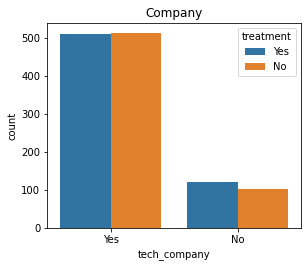

In [29]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(data['tech_company'], hue = data['treatment'])
plt.title('Company')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Benefits')

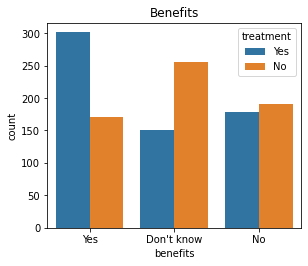

In [30]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(data['benefits'], hue = data['treatment'])
plt.title('Benefits')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Care Options')

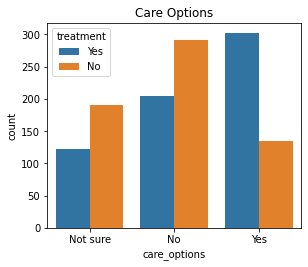

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(data['care_options'], hue = data['treatment'])
plt.title('Care Options')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Equal importance to Mental and Physical health')

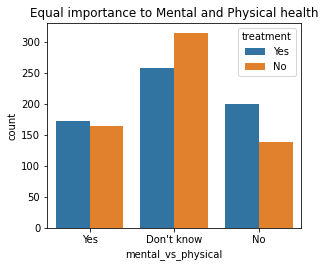

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(data['mental_vs_physical'], hue = data['treatment'])
plt.title('Equal importance to Mental and Physical health')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wellness Program')

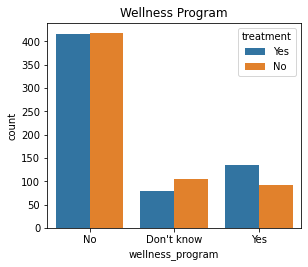

In [33]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(data['wellness_program'], hue = data['treatment'])
plt.title('Wellness Program')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anonymity')

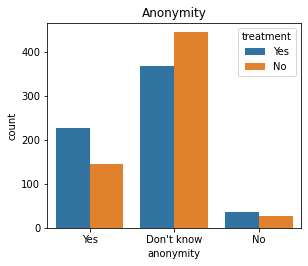

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(data['anonymity'], hue = data['treatment'])
plt.title('Anonymity')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leave')

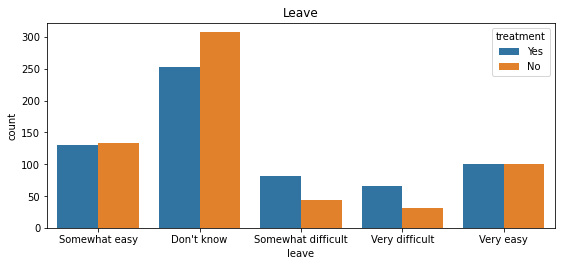

In [35]:
plt.figure(figsize=(20,40))
plt.subplot(9,2,11)
sb.countplot(data['leave'], hue = data['treatment'])
plt.title('Leave')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mental Health Consequence')

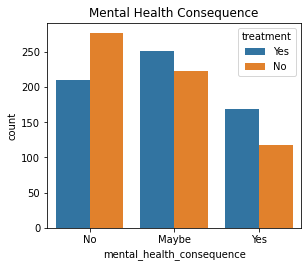

In [36]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(data['mental_health_consequence'], hue = data['treatment'])
plt.title('Mental Health Consequence')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Physical Health Consequnce')

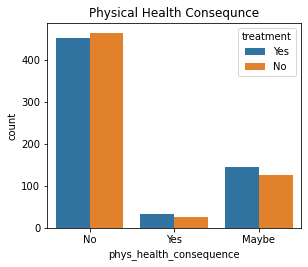

In [37]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(data['phys_health_consequence'], hue = data['treatment'])
plt.title('Physical Health Consequnce')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Coworkers')

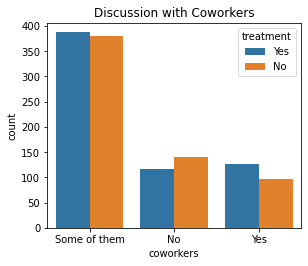

In [38]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(data['coworkers'], hue = data['treatment'])
plt.title('Discussion with Coworkers')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Supervisor')

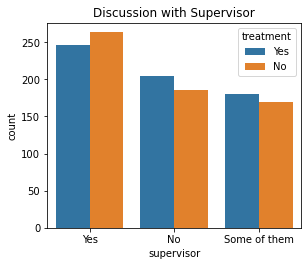

In [39]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(data['supervisor'], hue = data['treatment'])
plt.title('Discussion with Supervisor')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Interviewer(Mental)')

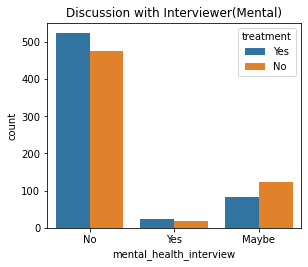

In [40]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(data['mental_health_interview'], hue = data['treatment'])
plt.title('Discussion with Interviewer(Mental)')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Interviewer(Physical)')

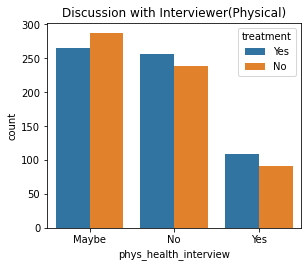

In [41]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data['phys_health_interview'], hue = data['treatment'])
plt.title('Discussion with Interviewer(Physical)')

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Consequence after Disclosure')

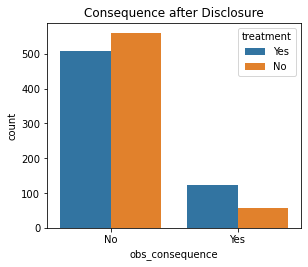

In [42]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(data['obs_consequence'], hue = data['treatment'])
plt.title('Consequence after Disclosure')

In [43]:
#Description of data
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
obj_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [46]:
#Dividing data into features and target
X = data.drop('treatment', axis = 1)
y = data['treatment']

In [47]:
#Ordinal encoding the categorical features
ct = ColumnTransformer([('oe',OrdinalEncoder(),['Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'])],remainder='passthrough')

In [48]:
X = ct.fit_transform(X)

In [49]:
#Label encoding the target
le = LabelEncoder()
y = le.fit_transform(y)

In [50]:
X

array([[ 0.,  0.,  0., ...,  2.,  0., 37.],
       [ 1.,  0.,  0., ...,  0.,  0., 44.],
       [ 1.,  0.,  0., ...,  1.,  0., 32.],
       ...,
       [ 1.,  0.,  1., ...,  1.,  0., 34.],
       [ 0.,  0.,  0., ...,  1.,  0., 46.],
       [ 1.,  0.,  1., ...,  0.,  0., 25.]])

In [51]:
y


array([1, 0, 0, ..., 1, 0, 1])

In [52]:
y.shape

(1247,)

In [53]:
#Saving the column transformer instance
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [54]:
#Splitting data into train and test in the ratio 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=49)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [57]:
#Creating a dictionary of all models
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)

In [58]:
#function to print accuracy of all models
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test,y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    
    print()

In [59]:
for model_name,model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

======================================Logistic regression=======================================
Score is : 0.848

======================================KNN Classifier=======================================
Score is : 0.776

======================================Decision Tree Classifier=======================================
Score is : 0.7946666666666666

======================================Random Forest Classifier=======================================
Score is : 0.8533333333333334

======================================AdaBoost Classifier=======================================
Score is : 0.864

======================================Gradient Boosting Classifier=======================================
Score is : 0.84

[11:41:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
===================

C:\Users\mshiv\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [60]:
#Fitting data to AdaBoost classifier
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost=',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost= 0.864


Text(33.0, 0.5, 'Actual')

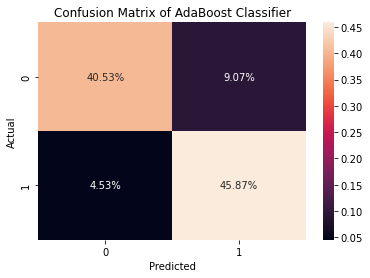

In [61]:
#Plotting confusion matrix
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

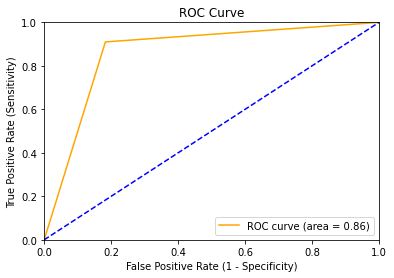

(array([0.       , 0.1827957, 1.       ]),
 array([0.        , 0.91005291, 1.        ]),
 array([2, 1, 0]))

In [62]:
#Plotting ROC curve
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc)

In [63]:
#Printing classification report
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       186
           1       0.83      0.91      0.87       189

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



In [64]:
#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)],
          'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
          }
abc_random = RandomizedSearchCV(random_state=49,estimator=abc,param_distributions = params_abc,n_iter =50,cv=5,n_jobs=-1)


In [65]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [66]:
abc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [67]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.02}

In [68]:
#Fitting data to tuned model
abc_tuned = AdaBoostClassifier(random_state=49,n_estimators=11, learning_rate=1.02)
abc_tuned.fit(X_train,y_train)
pred_abc_tuned = abc_tuned.predict(X_test)
print('Accuracy of AdaBoost(tuned)=',accuracy_score(y_test,pred_abc_tuned))

Accuracy of AdaBoost(tuned)= 0.8693333333333333


Text(33.0, 0.5, 'Actual')

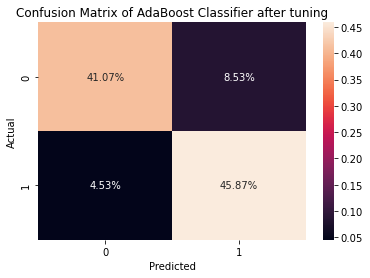

In [69]:
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

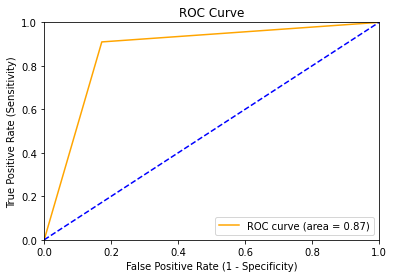

(array([0.        , 0.17204301, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([2, 1, 0]))

In [70]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(y_test, pred_abc_tuned)
roc_auc_abc_tuned = metrics.auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc_tuned)

In [71]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [72]:
feature_cols = ['Age', 'Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [73]:
new = joblib.load('feature_values')

In [74]:
#Testing with custom input
p = new.transform(pd.DataFrame([[25,'Female','Yes','Yes','Never','1-5','Yes','No','Yes','Yes','No','No','Yes','Somewhat difficult','Maybe','No','Some of them','Yes','No','Yes','No','Yes']],columns=feature_cols))

In [75]:
abc_tuned.predict(p)

array([1])

In [76]:
#saving model
import pickle
pickle.dump(abc_tuned,open('model.pkl','wb'))